In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext nb_black

In [2]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
use_file = "/home/markowitzmeister_gmail_com/workspace/raw_data/published_data/cell_2018/neuromatch_export.h5"

In [4]:
def printall(name, obj):
    print(name, dict(obj.attrs))

In [5]:
with h5py.File(use_file, "r") as f:
    # each session is mapped to a uuid
    uuids = list(f.keys())
    
    # print the attributes for a single dataset
    f[uuids[0]].visititems(printall) 
    
    # load in the data for the first session
    
    dspn_dff = f[uuids[0]]["dspn_dff"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    timestamps = f[uuids[0]]["timestamps"][()].ravel()
    syllables = f[uuids[0]]["syllables"][()].ravel()

date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}


In [6]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


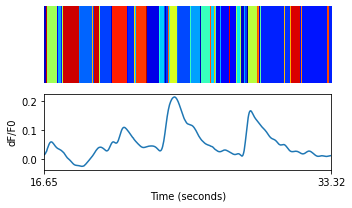

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(5, 3), sharex=True)
plt_pts = slice(500, 1000)
ax[0].imshow(np.tile(syllables[plt_pts], [100, 1]), aspect="auto", cmap=cmap)
ax[0].axis("off")
ax[1].plot(ispn_dff[plt_pts])
ax[1].set_xticks((0, (plt_pts.stop - plt_pts.start)))
ax[1].set_xticklabels(np.around(timestamps[[plt_pts.start, plt_pts.stop]], 2))
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("dF/F0")
plt.tight_layout()